Sure, I'll update the code to include progress bars using the `tqdm` library and print statements to indicate when the vectorization is complete. Here's the updated code:

### Cell 1: Import Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pickle
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim.models import Word2Vec
from tqdm import tqdm

warnings.filterwarnings("ignore")



### Cell 2: Vectorize using BoW


In [6]:
result_df = pd.read_csv("result_df.csv")
result_df.head()

,Text,Score
0,bought several vitality canned dog food produc...,1
1,product arrived labeled jumbo salted peanuts p...,0
2,confection around centuries light pillowy citr...,1
3,looking secret ingredient robitussin believe f...,0
4,great taffy great price wide assortment yummy ...,1


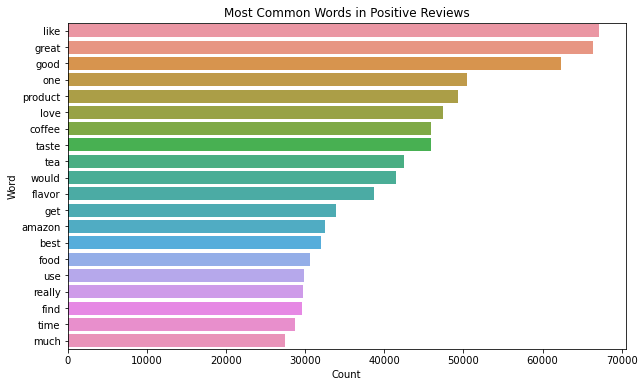

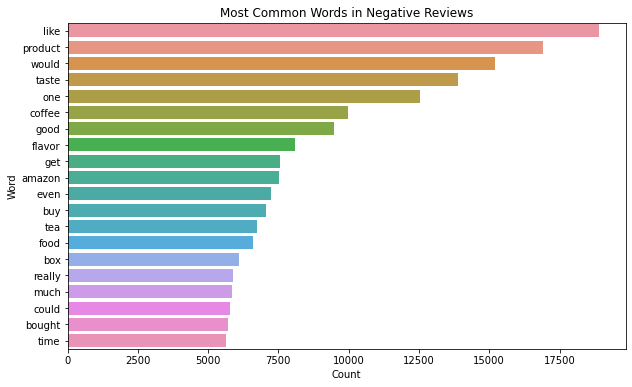

In [8]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot the most common words
def plot_most_common_words(text_data, title):
    # Convert all items to strings and join them
    all_words = ' '.join(map(str, text_data)).split()
    word_freq = Counter(all_words)
    common_words = word_freq.most_common(20)
    words, counts = zip(*common_words)

    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(counts), y=list(words))
    plt.title(title)
    plt.xlabel('Count')
    plt.ylabel('Word')
    plt.show()

# Plot most common words in positive reviews
positive_reviews = result_df[result_df['Score'] == 1]['Text']
plot_most_common_words(positive_reviews, 'Most Common Words in Positive Reviews')

# Plot most common words in negative reviews
negative_reviews = result_df[result_df['Score'] == 0]['Text']
plot_most_common_words(negative_reviews, 'Most Common Words in Negative Reviews')

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to generate and display a word cloud
def plot_word_cloud(text_data, title):
    # Convert all items to strings and join them
    all_words = ' '.join(map(str, text_data))
    
    # Generate the word cloud using default font
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

    # Plot the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Plot word cloud for positive reviews
positive_reviews = result_df[result_df['Score'] == 1]['Text']
plot_word_cloud(positive_reviews, 'Word Cloud for Positive Reviews')

# Plot word cloud for negative reviews
negative_reviews = result_df[result_df['Score'] == 0]['Text']
plot_word_cloud(negative_reviews, 'Word Cloud for Negative Reviews')


ValueError: Only supported for TrueType fonts

In [ ]:
# pip install --upgrade pip

In [ ]:
# pip install --upgrade Pillow

In [ ]:
# Initialize the CountVectorizer for BoW
count_vect = CountVectorizer(ngram_range=(1, 1), min_df=5)

# Apply vectorizer with progress bar
print("Applying BoW vectorizer to training data...")
X_train_bow = count_vect.fit_transform(tqdm(X_train))
print("Applying BoW vectorizer to CV data...")
X_cv_bow = count_vect.transform(tqdm(X_cv))
print("Applying BoW vectorizer to test data...")
X_test_bow = count_vect.transform(tqdm(X_test))

# Save the BoW vectorized matrices
with open('X_train_bow.pkl', 'wb') as f:
    pickle.dump(X_train_bow, f)
with open('X_cv_bow.pkl', 'wb') as f:
    pickle.dump(X_cv_bow, f)
with open('X_test_bow.pkl', 'wb') as f:
    pickle.dump(X_test_bow, f)

print("BoW vectorization complete and saved.")



### Cell 3: Vectorize using TF-IDF


In [ ]:
# Initialize the TfidfVectorizer
tfidf_vect = TfidfVectorizer(ngram_range=(1, 1), min_df=5)

# Apply vectorizer with progress bar
print("Applying TF-IDF vectorizer to training data...")
X_train_tfidf = tfidf_vect.fit_transform(tqdm(X_train))
print("Applying TF-IDF vectorizer to CV data...")
X_cv_tfidf = tfidf_vect.transform(tqdm(X_cv))
print("Applying TF-IDF vectorizer to test data...")
X_test_tfidf = tfidf_vect.transform(tqdm(X_test))

# Save the TF-IDF vectorized matrices
with open('X_train_tfidf.pkl', 'wb') as f:
    pickle.dump(X_train_tfidf, f)
with open('X_cv_tfidf.pkl', 'wb') as f:
    pickle.dump(X_cv_tfidf, f)
with open('X_test_tfidf.pkl', 'wb') as f:
    pickle.dump(X_test_tfidf, f)

print("TF-IDF vectorization complete and saved.")



### Cell 4: Vectorize using Word2Vec


In [ ]:
# Tokenize the reviews for Word2Vec
X_train_tokens = [review.split() for review in X_train]
X_cv_tokens = [review.split() for review in X_cv]
X_test_tokens = [review.split() for review in X_test]

# Train the Word2Vec model
print("Training Word2Vec model...")
w2v_model = Word2Vec(sentences=tqdm(X_train_tokens), vector_size=100, window=5, min_count=5, workers=4)

# Vectorize the training, CV, and test data using the Word2Vec model
def vectorize_w2v(tokens, model):
    vectorized = []
    for token_list in tqdm(tokens):
        vector = np.mean([model.wv[word] for word in token_list if word in model.wv], axis=0)
        if isinstance(vector, np.ndarray):
            vectorized.append(vector)
        else:
            vectorized.append(np.zeros(model.vector_size))
    return np.array(vectorized)

print("Applying Word2Vec vectorizer to training data...")
X_train_w2v = vectorize_w2v(X_train_tokens, w2v_model)
print("Applying Word2Vec vectorizer to CV data...")
X_cv_w2v = vectorize_w2v(X_cv_tokens, w2v_model)
print("Applying Word2Vec vectorizer to test data...")
X_test_w2v = vectorize_w2v(X_test_tokens, w2v_model)

# Save the Word2Vec vectorized matrices
with open('X_train_w2v.pkl', 'wb') as f:
    pickle.dump(X_train_w2v, f)
with open('X_cv_w2v.pkl', 'wb') as f:
    pickle.dump(X_cv_w2v, f)
with open('X_test_w2v.pkl', 'wb') as f:
    pickle.dump(X_test_w2v, f)

print("Word2Vec vectorization complete and saved.")



This code will display progress bars for each vectorization step and print statements to indicate when each vectorization is complete. The `tqdm` library is used to show the progress bars.

In [12]:
import pandas as pd
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Sure, I'll rewrite the code for direct execution without defining functions and remove the 5th cell. Here is the optimized and arranged code:

### Cell 1: Import Libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

warnings.filterwarnings("ignore")



### Cell 2: Cross-Validation with GridSearchCV


In [ ]:
# Define the parameter grid for alpha
param_grid = {'alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}

# Initialize GridSearchCV with MultinomialNB
grid_search = GridSearchCV(estimator=MultinomialNB(), param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=1, scoring='accuracy')

# Fit the model to the training data
grid_search.fit(X_train_bow, y_train)

# Extract the best alpha value
optimal_alpha = grid_search.best_params_['alpha']
cv_scores = grid_search.cv_results_['mean_test_score']

print('Optimal Value for alpha is:', optimal_alpha)



### Cell 3: Plot Cross-Validation Error


In [ ]:
# Calculate Mean Squared Error
mse = [1 - x for x in cv_scores]

# Plot the CV error vs alpha values
plt.figure(figsize=(8, 8))
alphas = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
plt.plot(alphas, mse, linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)

for xy in zip(alphas, np.round(mse, 3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.title('CV Error vs Alpha Value')
plt.xlabel('Alpha Values')
plt.ylabel('CV Error')
plt.show()



### Cell 4: Train and Evaluate Model


In [ ]:
# Initialize the Naive Bayes classifier with the optimal alpha
nb_classifier = MultinomialNB(alpha=optimal_alpha)

# Fit the model to the training data
nb_classifier.fit(X_train_bow, y_train)

# Predict on the test data
y_pred = nb_classifier.predict(X_test_bow)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'\nThe accuracy score of the Naive Bayes Classifier on Test Data for alpha = {optimal_alpha} is {accuracy}')
print('*' * 100)

# Compute and display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix for Bag_of_Words:\n', cm)
print('*' * 100)

# Plot the confusion matrix
class_labels = ["negative", "positive"]
df_cm = pd.DataFrame(cm, index=class_labels, columns=class_labels)
sns.heatmap(df_cm, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
print('*' * 100)

# Print classification report
print(f'\nClassification Report for MultinomialNB with alpha = {optimal_alpha}:\n', classification_report(y_test, y_pred))



This code is now organized into separate cells for cross-validation, plotting, training, and evaluation, and is written for direct execution without defining functions.

In [5]:
data = pd.read_csv("Reviews.csv")

In [6]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [7]:
print("No of data points in the data :",data.shape[0])
print("No of columns points in the data : ",data.shape[1])
print("Columns in the dataframe:\n ",data.columns.tolist())


No of data points in the data : 568454
No of columns points in the data :  10
Columns in the dataframe:
  ['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text']


DataFrame with several columns related to product reviews. Here's a breakdown of what each column likely represents:

- **Id**: A unique identifier for each review.
- **ProductId**: A unique identifier for each product.
- **UserId**: A unique identifier for each user who left a review.
- **ProfileName**: The name of the user who left the review.
- **HelpfulnessNumerator**: The number of users who found the review helpful.
- **HelpfulnessDenominator**: The total number of users who rated the review's helpfulness.
- **Score**: The rating given by the user (possibly on a scale of 1 to 5).
- **Time**: The timestamp when the review was posted.
- **Summary**: A short summary of the review.
- **Text**: The full text of the review.


In [8]:
# Step 1: Basic Information and Summary Statistics
print("Basic Information:")
print(data.info())

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB
None


In [9]:
print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
                  Id  HelpfulnessNumerator  HelpfulnessDenominator  \
count  568454.000000         568454.000000            568454.00000   
mean   284227.500000              1.743817                 2.22881   
std    164098.679298              7.636513                 8.28974   
min         1.000000              0.000000                 0.00000   
25%    142114.250000              0.000000                 0.00000   
50%    284227.500000              0.000000                 1.00000   
75%    426340.750000              2.000000                 2.00000   
max    568454.000000            866.000000               923.00000   

               Score          Time  
count  568454.000000  5.684540e+05  
mean        4.183199  1.296257e+09  
std         1.310436  4.804331e+07  
min         1.000000  9.393408e+08  
25%         4.000000  1.271290e+09  
50%         5.000000  1.311120e+09  
75%         5.000000  1.332720e+09  
max         5.000000  1.351210e+09  


In [10]:
# Step 2: Missing Values Analysis
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64


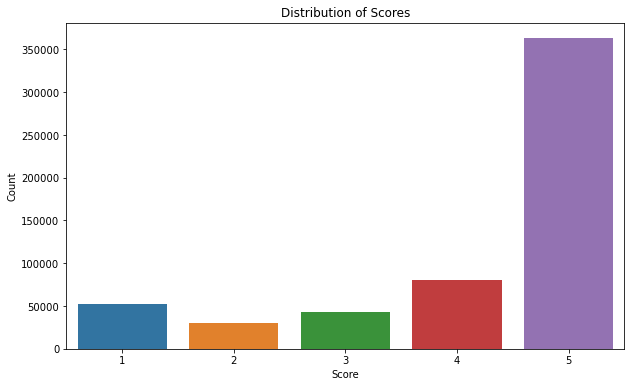

In [13]:
# Step 3: Distribution of Numerical Features
# Plotting the distribution of 'Score'
plt.figure(figsize=(10, 6))
sns.countplot(data['Score'])
plt.title('Distribution of Scores')
plt.xlabel('Score')
plt.ylabel('Count')
plt.show()

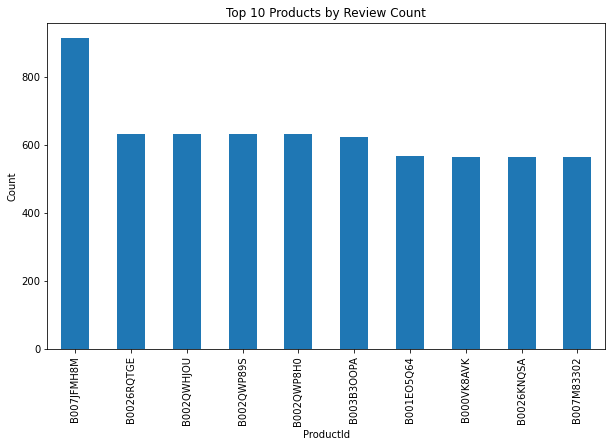

In [14]:
# Step 4: Distribution of Categorical Features
# Plotting the distribution of 'ProductId'
plt.figure(figsize=(10, 6))
data['ProductId'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Products by Review Count')
plt.xlabel('ProductId')
plt.ylabel('Count')
plt.show()


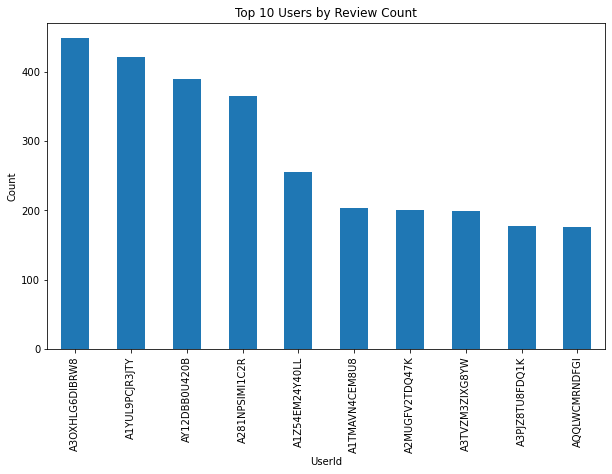

In [15]:
# Plotting the distribution of 'UserId'
plt.figure(figsize=(10, 6))
data['UserId'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Users by Review Count')
plt.xlabel('UserId')
plt.ylabel('Count')
plt.show()

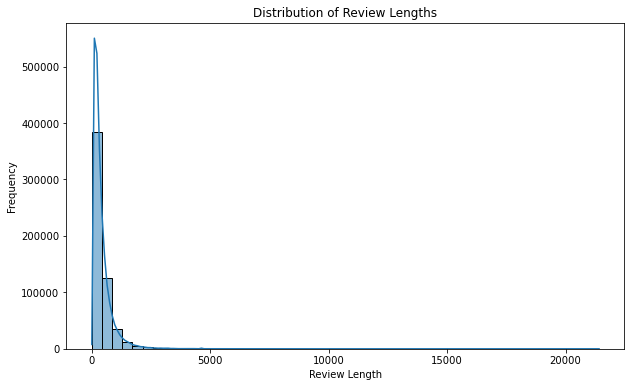

In [16]:
# Step 5: Text Data Analysis
# Length of reviews
data['ReviewLength'] = data['Text'].apply(len)

plt.figure(figsize=(10, 6))
sns.histplot(data['ReviewLength'], bins=50, kde=True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()


In [17]:
# Most common words in reviews
from collections import Counter
import re

def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    return text

data['ProcessedText'] = data['Text'].apply(preprocess_text)
all_words = ' '.join(data['ProcessedText']).split()
word_freq = Counter(all_words)

In [7]:
# #create histogram of the reviews

# import matplotlib.pyplot as plt
# import numpy as np
 
# # Generate random data for the histogram
# # data = np.random.randn(1000)
 
# # Plotting a basic histogram
# plt.hist(data, bins=30, color='skyblue', edgecolor='black')
 
# # Adding labels and title
# plt.xlabel('Values')
# plt.ylabel('Frequency')
# plt.title('Basic Histogram')
 
# # Display the plot
# plt.show()


## Data on Distribution of ratings

## popular words positive reviews

## Frequency of reviewers

In [8]:
#remove the reviews that have the score = 3






In [23]:
df = data.drop(data[data['Score'] == 3].index)
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,ReviewLength,ProcessedText
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,263,i have bought several of the vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,190,product arrived labeled as jumbo salted peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,509,this is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,219,if you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,140,great taffy at a great price there was a wide...


In [24]:
def sentiment_type(x):
    if x > 3:
        return 'positive'
    return 'negative'

#changing reviews with score less than 3 to be positive and vice-versa

actual_score = df['Score']
df['Score'] = actual_score.map(sentiment_type)

print("Number of data points in our data", df.shape)
df.head()

Number of data points in our data (525814, 12)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,ReviewLength,ProcessedText
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,positive,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,263,i have bought several of the vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,negative,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,190,product arrived labeled as jumbo salted peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,positive,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,509,this is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,negative,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,219,if you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,positive,1350777600,Great taffy,Great taffy at a great price. There was a wid...,140,great taffy at a great price there was a wide...


In [25]:
#remove the duplicate reviews from a single user

In [26]:
#check for similarity or repetition of reviews from the same costumer

#we will filter and find the duplicate reviews
filtered_df = df[df['UserId'] == 'AR5J8UI46CURR']
duplicate_reviews = filtered_df[filtered_df.duplicated(subset=['UserId', 'Text'], keep=False)]

# Step 3: Print the ProductId and Text for the duplicates
filtered_df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,ReviewLength,ProcessedText
73790,73791,B000HDOPZG,AR5J8UI46CURR,Geetha Krishnan,2,2,positive,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...,113,delicious wafers i find that european wafers a...
78444,78445,B000HDL1RQ,AR5J8UI46CURR,Geetha Krishnan,2,2,positive,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...,113,delicious wafers i find that european wafers a...
138276,138277,B000HDOPYM,AR5J8UI46CURR,Geetha Krishnan,2,2,positive,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...,113,delicious wafers i find that european wafers a...
138316,138317,B000HDOPYC,AR5J8UI46CURR,Geetha Krishnan,2,2,positive,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...,113,delicious wafers i find that european wafers a...
155048,155049,B000PAQ75C,AR5J8UI46CURR,Geetha Krishnan,2,2,positive,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...,113,delicious wafers i find that european wafers a...


Here's a simplified explanation of the text:

---

A user left multiple reviews that were identical in every way except for the product they were reviewing. For example, two different product IDs represent different flavors of the same brand's wafer cookies. 

After analyzing the data, it was determined that when reviews are identical except for the `ProductId`, they likely refer to variations of the same product, like different flavors or sizes. To avoid having redundant reviews in the dataset, the decision was made to remove these duplicate reviews.

The method used to clean up the data was:
1. **Sort the reviews by `ProductId`**: This groups similar products together.
2. **Keep only the first review for each product**: This ensures that only one review remains as a representative for each product variation.

By doing this, we reduce redundancy, making sure that each product has only one review, even if there are multiple variations like different flavors. Sorting the data first is crucial because it ensures that similar products are grouped together, preventing different versions of the same product from being accidentally left in the dataset.

In [27]:
#Sorting data according to ProductId in ascending order
# sorted_data=df.sort_values('ProductId', axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')

#Deduplication of entries
final_df=df.drop_duplicates(subset={"UserId"}, keep='first', inplace=False)
final_df.shape

(243414, 12)

In [28]:
final_df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,ReviewLength,ProcessedText
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,positive,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,263,i have bought several of the vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,negative,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,190,product arrived labeled as jumbo salted peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,positive,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,509,this is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,negative,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,219,if you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,positive,1350777600,Great taffy,Great taffy at a great price. There was a wid...,140,great taffy at a great price there was a wide...


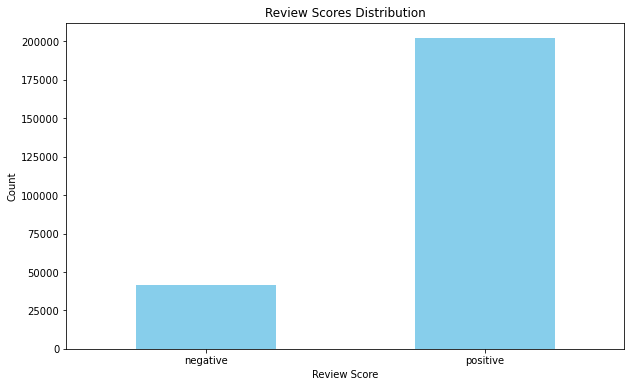

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'reviews' is the column with review scores
# df = pd.read_csv('your_file.csv')  # Uncomment and modify if you need to load the DataFrame

# Count the occurrences of each review score
review_counts = final_df['Score'].value_counts().sort_index()

# Plot the bar graph
plt.figure(figsize=(10, 6))
review_counts.plot(kind='bar', color='skyblue')
plt.title('Review Scores Distribution')
plt.xlabel('Review Score')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [30]:
# import pandas as pd
# import matplotlib.pyplot as plt


# # Assuming final_df is your DataFrame and 'user' and 'reviews' are the relevant columns
# # final_df = pd.read_csv('your_file.csv')  # Uncomment and modify if you need to load the DataFrame


# # Group by user and count the occurrences of each review score
# user_review_counts = final_df.groupby('UserId')['Text'].value_counts().unstack(fill_value=0)


# # Plot the distribution for each user
# user_review_counts.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')
# plt.title('Distribution of Review Scores for Each User')
# plt.xlabel('User')
# plt.ylabel('Count of Reviews')
# plt.legend(title='Review Score', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.tight_layout()
# plt.show()



# [3].  Text Preprocessing.

Now that we have finished deduplication our data requires some preprocessing before we go on further with analysis and making the prediction model.

Hence in the Preprocessing phase we do the following in the order below:-

1. Begin by removing the html tags
2. Remove any punctuations or limited set of special characters like , or . or # etc.
3. Check if the word is made up of english letters and is not alpha-numeric
4. Check to see if the length of the word is greater than 2 (as it was researched that there is no adjective in 2-letters)
5. Convert the word to lowercase
6. Remove Stopwords
7. Finally Snowball Stemming the word (it was obsereved to be better than Porter Stemming)<br>

After which we collect the words used to describe positive and negative reviews

In [26]:
# pip install tqdm

In [37]:
import re
from bs4 import BeautifulSoup
from tqdm import tqdm
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already downloaded
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Function to expand contractions
def expand_contractions(text):
    # specific
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"can\'t", "can not", text)
    # general
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    return text

# Preprocess the reviews
cleaned_reviews = []

# tqdm is for printing the status bar
for review in tqdm(final_df['Text'].values):
    review = re.sub(r"http\S+", "", review)
    review = BeautifulSoup(review, 'lxml').get_text()
    review = expand_contractions(review)
    review = re.sub("\S*\d\S*", "", review).strip()
    review = re.sub('[^A-Za-z]+', ' ', review)
    # https://gist.github.com/sebleier/554280
    review = ' '.join(word.lower() for word in review.split() if word.lower() not in stop_words)
    cleaned_reviews.append(review.strip())

# Add the cleaned reviews to the dataframe
final_df['CleanedText'] = cleaned_reviews

# Map scores: 'positive' to 1, 'negative' to 0
final_df['Score'] = final_df['Score'].map({'positive': 1, 'negative': 0})

# Return the dataframe with only the 'Text' and 'Score' columns
result_df = final_df[['CleanedText', 'Score']]
result_df.rename(columns={'CleanedText': 'Text'}, inplace=True)

# Display the resulting dataframe
print(result_df.head())

# If you want to return the dataframe from a function, you can use:
# return result_df

[nltk_data] Downloading package stopwords to C:\Users\Prince
[nltk_data]     Rana\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
100%|████████████████████████████████████████████████████████████████████████| 243414/243414 [01:14<00:00, 3286.60it/s]

                                                Text  Score
0  bought several vitality canned dog food produc...      1
1  product arrived labeled jumbo salted peanuts p...      0
2  confection around centuries light pillowy citr...      1
3  looking secret ingredient robitussin believe f...      0
4  great taffy great price wide assortment yummy ...      1


In [38]:
result_df.head()

,Text,Score
0,bought several vitality canned dog food produc...,1
1,product arrived labeled jumbo salted peanuts p...,0
2,confection around centuries light pillowy citr...,1
3,looking secret ingredient robitussin believe f...,0
4,great taffy great price wide assortment yummy ...,1


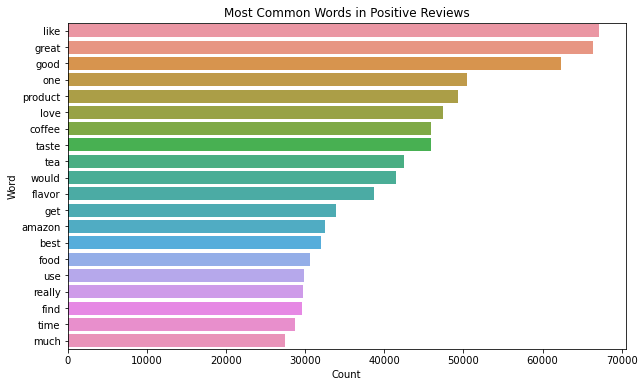

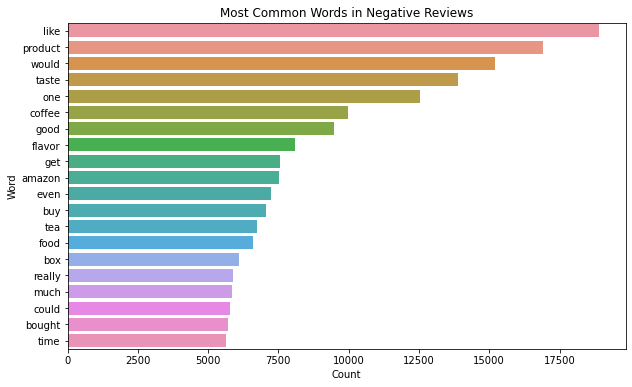

In [39]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot the most common words
def plot_most_common_words(text_data, title):
    all_words = ' '.join(text_data).split()
    word_freq = Counter(all_words)
    common_words = word_freq.most_common(20)
    words, counts = zip(*common_words)

    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(counts), y=list(words))
    plt.title(title)
    plt.xlabel('Count')
    plt.ylabel('Word')
    plt.show()

# Plot most common words in positive reviews
positive_reviews = result_df[result_df['Score'] == 1]['Text']
plot_most_common_words(positive_reviews, 'Most Common Words in Positive Reviews')

# Plot most common words in negative reviews
negative_reviews = result_df[result_df['Score'] == 0]['Text']
plot_most_common_words(negative_reviews, 'Most Common Words in Negative Reviews')

In [50]:
import os

# Define the file name
file_name = 'result_df.csv'

# Check if the file already exists and delete it if it does
if os.path.exists(file_name):
    os.remove(file_name)

# Save the dataframe to a CSV file
result_df.to_csv(file_name, index=False)

print(f"File saved as {file_name}")

File saved as result_df.csv


# DATA PREPROCESSING

In [43]:
preprocessed_reviews[1]

'product arrived labeled jumbo salted peanuts peanuts actually small sized unsalted not sure error vendor intended represent product jumbo'

In [28]:
#Using Skikit - Learn
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

#Natural Language processing toolkit
from nltk.stem.porter import PorterStemmer

import re   #------------Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords 
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

## 1) Bag of words

In [29]:
#BoW
count_vect = CountVectorizer() #in scikit-learn
count_vect.fit(preprocessed_reviews)
print("some feature names ", count_vect.get_feature_names()[:10])
print('='*50)

final_counts = count_vect.transform(preprocessed_reviews)
print("the type of count vectorizer ",type(final_counts))
print("the shape of out text BOW vectorizer ",final_counts.get_shape())
print("the number of unique words ", final_counts.get_shape()[1])

some feature names  ['aa', 'aaa', 'aaaa', 'aaaaa', 'aaaaaa', 'aaaaaaaaaaaa', 'aaaaaaaaaaaaa', 'aaaaaaaaaaaaaaa', 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa', 'aaaaaaaaaaaaaaaaaaaargh']
the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text BOW vectorizer  (243414, 91330)
the number of unique words  91330


## 2) Bi-Grams and n-Grams.

In [30]:
#bi-gram, tri-gram and n-gram

#removing stop words like "not" should be avoided before building n-grams
# count_vect = CountVectorizer(ngram_range=(1,2))
# please do read the CountVectorizer documentation
# http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html


count_vect = CountVectorizer(ngram_range=(1,2))
final_bigram_counts = count_vect.fit_transform(preprocessed_reviews)

#inferences now after bigrams
print("the type of count vectorizer ",type(final_bigram_counts))
print("the shape of out text BOW vectorizer ",final_bigram_counts.get_shape())
print("the number of unique words including both unigrams and bigrams ", final_bigram_counts.get_shape()[1])

the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text BOW vectorizer  (243414, 2758098)
the number of unique words including both unigrams and bigrams  2758098


## 3) tF-iDF

In [31]:
tf_idf_vect = TfidfVectorizer(ngram_range=(1,2), min_df=10)
tf_idf_vect.fit(preprocessed_reviews)
print("some sample features(unique words in the corpus)",tf_idf_vect.get_feature_names()[0:10])
print('='*50)

final_tf_idf = tf_idf_vect.transform(preprocessed_reviews)
print("the type of count vectorizer ",type(final_tf_idf))
print("the shape of out text TFIDF vectorizer ",final_tf_idf.get_shape())
print("the number of unique words including both unigrams and bigrams ", final_tf_idf.get_shape()[1])

some sample features(unique words in the corpus) ['aa', 'aaa', 'aafco', 'ab', 'aback', 'abandon', 'abandoned', 'abbey', 'abbott', 'abby']
the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text TFIDF vectorizer  (243414, 122358)
the number of unique words including both unigrams and bigrams  122358


In [32]:
preprocessed_reviews[:10]

['bought several vitality canned dog food products found good quality product looks like stew processed meat smells better labrador finicky appreciates product better',
 'product arrived labeled jumbo salted peanuts peanuts actually small sized unsalted not sure error vendor intended represent product jumbo',
 'confection around centuries light pillowy citrus gelatin nuts case filberts cut tiny squares liberally coated powdered sugar tiny mouthful heaven not chewy flavorful highly recommend yummy treat familiar story c lewis lion witch wardrobe treat seduces edmund selling brother sisters witch',
 'looking secret ingredient robitussin believe found got addition root beer extract ordered good made cherry soda flavor medicinal',
 'great taffy great price wide assortment yummy taffy delivery quick taffy lover deal',
 'got wild hair taffy ordered five pound bag taffy enjoyable many flavors watermelon root beer melon peppermint grape etc complaint bit much red black licorice flavored pieces

In [33]:
tf_idf_vect = TfidfVectorizer(ngram_range=(1,2), min_df=10)
tf_idf_vect.fit(preprocessed_reviews)

print("some sample features(unique words in the corpus)",tf_idf_vect.get_feature_names()[0:10])
print('='*50)

final_tf_idf = tf_idf_vect.transform(preprocessed_reviews)
print("the type of count vectorizer ",type(final_tf_idf))
print("the shape of out text TFIDF vectorizer ",final_tf_idf.get_shape())
print("the number of unique words including both unigrams and bigrams ", final_tf_idf.get_shape()[1])

some sample features(unique words in the corpus) ['aa', 'aaa', 'aafco', 'ab', 'aback', 'abandon', 'abandoned', 'abbey', 'abbott', 'abby']
the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text TFIDF vectorizer  (243414, 122358)
the number of unique words including both unigrams and bigrams  122358


In [34]:
final_tf_idf

<243414x122358 sparse matrix of type '<class 'numpy.float64'>'
	with 11134547 stored elements in Compressed Sparse Row format>

## 4) Word2Vec

In [35]:
# Train your own Word2Vec model using your own text corpus

i = 0
list_of_sentance = []
for sentence in preprocessed_reviews:
    list_of_sentance.append(sentence.split())

In [37]:
# Using Google News Word2Vectors

# in this project we are using a pretrained model by google
# its 3.3G file, once you load this into your memory 
# it occupies ~9Gb, so please do this step only if you have >12G of ram
# we will provide a pickle file wich contains a dict , 
# and it contains all our courpus words as keys and  model[word] as values
# To use this code-snippet, download "GoogleNews-vectors-negative300.bin" 
# from https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit
# it's 1.9GB in size.


# http://kavita-ganesan.com/gensim-word2vec-tutorial-starter-code/#.W17SRFAzZPY
# you can comment this whole cell
# or change these varible according to your need

is_your_ram_gt_16g=False
want_to_use_google_w2v = False
want_to_train_w2v = True

if want_to_train_w2v:
    # min_count = 5 considers only words that occured atleast 5 times
    w2v_model=Word2Vec(list_of_sentance,min_count=5,vector_size=50, workers=4)
    print(w2v_model.wv.most_similar('great'))
    print('='*50)
    print(w2v_model.wv.most_similar('worst'))
    
elif want_to_use_google_w2v and is_your_ram_gt_16g:
    if os.path.isfile('GoogleNews-vectors-negative300.bin'):
        w2v_model=KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)
        print(w2v_model.wv.most_similar('great'))
        print(w2v_model.wv.most_similar('worst'))
    else:
        print("you don't have gogole's word2vec file, keep want_to_train_w2v = True, to train your own w2v ")

[('fantastic', 0.889480710029602), ('awesome', 0.8689764738082886), ('good', 0.8598513603210449), ('terrific', 0.8459987044334412), ('excellent', 0.8428252935409546), ('wonderful', 0.8169965147972107), ('perfect', 0.7738545536994934), ('amazing', 0.7545012831687927), ('nice', 0.7280014157295227), ('fabulous', 0.7230628728866577)]
[('nastiest', 0.8327980041503906), ('greatest', 0.7793282866477966), ('disgusting', 0.7285985350608826), ('best', 0.7239693403244019), ('terrible', 0.7012728452682495), ('vile', 0.7011510729789734), ('horrible', 0.6742737293243408), ('horrid', 0.6636232733726501), ('awful', 0.6345300078392029), ('smoothest', 0.6203019618988037)]


In [39]:
# Get the list of words in the vocabulary
w2v_words = list(w2v_model.wv.index_to_key)
print("Number of words that occurred at least 5 times:", len(w2v_words))
print("Sample words:", w2v_words[:50])

Number of words that occurred at least 5 times: 26685
Sample words: ['not', 'like', 'good', 'great', 'product', 'one', 'taste', 'would', 'coffee', 'love', 'tea', 'flavor', 'get', 'no', 'amazon', 'food', 'really', 'time', 'best', 'use', 'much', 'find', 'buy', 'price', 'also', 'tried', 'little', 'even', 'make', 'well', 'try', 'better', 'first', 'could', 'found', 'used', 'bought', 'eat', 'chocolate', 'order', 'store', 'dog', 'sugar', 'water', 'made', 'box', 'bag', 'cup', 'free', 'day']


In [40]:
# average Word2Vec
# compute average word2vec for each review.
sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(list_of_sentance): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length 50, you might need to change this to 300 if you use google's w2v
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
print(len(sent_vectors))
print(len(sent_vectors[0]))

100%|█████████████████████████████████████████████████████████████████████████| 243414/243414 [06:28<00:00, 627.14it/s]

243414
50


In [41]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
model = TfidfVectorizer()
model.fit(preprocessed_reviews)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(model.get_feature_names(), list(model.idf_)))

In [45]:



# min_count = 5 considers only words that occured atleast 5 times
w2v_model = Word2Vec(tqdm(list_of_sentance), min_count=5, vector_size=50, workers=4)
print(w2v_model.wv.most_similar('great'))
print('='*50)
print(w2v_model.wv.most_similar('worst'))

100%|██████████████████████████████████████████████████████████████████████| 243414/243414 [00:01<00:00, 174990.41it/s]


[('fantastic', 0.8863908052444458), ('good', 0.8673759698867798), ('awesome', 0.8514402508735657), ('terrific', 0.8467060923576355), ('excellent', 0.8333490490913391), ('wonderful', 0.794810950756073), ('perfect', 0.7888652682304382), ('nice', 0.729278564453125), ('fabulous', 0.7247054576873779), ('amazing', 0.7057380080223083)]
[('nastiest', 0.8346260190010071), ('greatest', 0.7847599983215332), ('disgusting', 0.7074049115180969), ('best', 0.7074009776115417), ('terrible', 0.7054744362831116), ('horrible', 0.687549889087677), ('vile', 0.680081844329834), ('horrid', 0.6720100045204163), ('awful', 0.6624904274940491), ('foulest', 0.6427425146102905)]


In [ ]:
# Get the list of words in the vocabulary
w2v_words = list(w2v_model.wv.index_to_key)
print("Number of words that occurred at least 5 times:", len(w2v_words))
print("Sample words:", w2v_words[:50])

In [ ]:
# average Word2Vec
# compute average word2vec for each review.
sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(list_of_sentance): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length 50, you might need to change this to 300 if you use google's w2v
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
print(len(sent_vectors))
print(len(sent_vectors[0]))

In [46]:
# Train your own Word2Vec model using your own text corpus

i = 0
list_of_sentance = []
for sentence in preprocessed_reviews:
    list_of_sentance.append(sentence.split())

In [48]:
# min_count = 5 considers only words that occured atleast 5 times
w2v_model=Word2Vec(list_of_sentance,min_count=5,vector_size=50, workers=4)
print(w2v_model.wv.most_similar('great'))
print('='*50)
print(w2v_model.wv.most_similar('worst'))

[('fantastic', 0.8812409043312073), ('good', 0.8648420572280884), ('awesome', 0.8592662215232849), ('terrific', 0.8501315712928772), ('excellent', 0.8424282073974609), ('wonderful', 0.8067846298217773), ('perfect', 0.7727386355400085), ('fabulous', 0.7179938554763794), ('nice', 0.7139560580253601), ('amazing', 0.7085402011871338)]
[('nastiest', 0.8263998627662659), ('greatest', 0.764772355556488), ('disgusting', 0.7401778697967529), ('best', 0.7220073342323303), ('terrible', 0.6957675814628601), ('horrible', 0.6699680089950562), ('vile', 0.6656027436256409), ('tastiest', 0.6604187488555908), ('horrid', 0.6464526057243347), ('awful', 0.6335384845733643)]


In [50]:
w2v_words = list(w2v_model.wv.index_to_key)
print("number of words that occured minimum 5 times ",len(w2v_words))
print("sample words ", w2v_words[0:50])

number of words that occured minimum 5 times  26685
sample words  ['not', 'like', 'good', 'great', 'product', 'one', 'taste', 'would', 'coffee', 'love', 'tea', 'flavor', 'get', 'no', 'amazon', 'food', 'really', 'time', 'best', 'use', 'much', 'find', 'buy', 'price', 'also', 'tried', 'little', 'even', 'make', 'well', 'try', 'better', 'first', 'could', 'found', 'used', 'bought', 'eat', 'chocolate', 'order', 'store', 'dog', 'sugar', 'water', 'made', 'box', 'bag', 'cup', 'free', 'day']


In [51]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
model = TfidfVectorizer()
model.fit(preprocessed_reviews)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(model.get_feature_names(), list(model.idf_)))

In [53]:
from gensim.models import Word2Vec
from tqdm import tqdm
import logging
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# Tokenize the reviews
tokenized_reviews = [review.split() for review in preprocessed_reviews]

# Enable logging for gensim
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

# Wrap the tokenized_reviews with tqdm for progress bar
w2v_model = Word2Vec(tqdm(tokenized_reviews), min_count=5, vector_size=50, workers=4)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(preprocessed_reviews)

# Get the feature names (words)
feature_names = tfidf_vectorizer.get_feature_names_out()

# Create a dictionary to hold the TF-IDF weights for each word
tfidf_weights = {word: tfidf_matrix[:, idx].toarray().flatten() for word, idx in tfidf_vectorizer.vocabulary_.items()}

# Function to compute the TF-IDF weighted Word2Vec vector for a review
def tfidf_weighted_w2v(review, model, tfidf_weights):
    words = review.split()
    word_vecs = []
    for word in words:
        if word in model.wv and word in tfidf_weights:
            word_vecs.append(model.wv[word] * tfidf_weights[word])
    if len(word_vecs) == 0:
        return np.zeros(model.vector_size)
    return np.mean(word_vecs, axis=0)

# Compute the TF-IDF weighted Word2Vec vectors for all reviews with a progress bar
tfidf_w2v_vectors = np.array([tfidf_weighted_w2v(review, w2v_model, tfidf_weights) for review in tqdm(preprocessed_reviews)])

# Example: Print the TF-IDF weighted Word2Vec vector for the first review
print("TF-IDF weighted Word2Vec vector for the first review:")
print(tfidf_w2v_vectors[0])

  0%|                                                                                       | 0/243414 [00:00<?, ?it/s]2024-08-25 23:08:53,994 : INFO : collecting all words and their counts
2024-08-25 23:08:53,994 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2024-08-25 23:08:54,064 : INFO : PROGRESS: at sentence #10000, processed 368159 words, keeping 18591 word types
 12%|████████▍                                                              | 28868/243414 [00:00<00:01, 144150.82it/s]2024-08-25 23:08:54,197 : INFO : PROGRESS: at sentence #30000, processed 1109443 words, keeping 31177 word types
2024-08-25 23:08:54,269 : INFO : PROGRESS: at sentence #40000, processed 1472489 words, keeping 35890 word types
 18%|████████████▊                                                          | 44084/243414 [00:00<00:01, 147136.65it/s]2024-08-25 23:08:54,330 : INFO : PROGRESS: at sentence #50000, processed 1839394 words, keeping 40192 word types
2024-08-25 23:08:54,39

2024-08-25 23:09:05,281 : INFO : EPOCH 2 - PROGRESS: at 58.81% examples, 2320046 words/s, in_qsize 7, out_qsize 0
2024-08-25 23:09:06,291 : INFO : EPOCH 2 - PROGRESS: at 90.15% examples, 2330210 words/s, in_qsize 7, out_qsize 0
2024-08-25 23:09:06,609 : INFO : EPOCH 2: training on 8491351 raw words (7731106 effective words) took 3.3s, 2318346 effective words/s
2024-08-25 23:09:07,628 : INFO : EPOCH 3 - PROGRESS: at 28.01% examples, 2245108 words/s, in_qsize 8, out_qsize 0
2024-08-25 23:09:08,629 : INFO : EPOCH 3 - PROGRESS: at 57.11% examples, 2256346 words/s, in_qsize 7, out_qsize 0
2024-08-25 23:09:09,625 : INFO : EPOCH 3 - PROGRESS: at 87.84% examples, 2272764 words/s, in_qsize 7, out_qsize 0
2024-08-25 23:09:10,000 : INFO : EPOCH 3: training on 8491351 raw words (7729450 effective words) took 3.4s, 2282801 effective words/s
2024-08-25 23:09:11,024 : INFO : EPOCH 4 - PROGRESS: at 29.50% examples, 2340499 words/s, in_qsize 7, out_qsize 0
2024-08-25 23:09:12,028 : INFO : EPOCH 4 - PRO

AttributeError: 'TfidfVectorizer' object has no attribute 'get_feature_names_out'

In [55]:
from gensim.models import Word2Vec
from tqdm import tqdm
import logging
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# Assuming preprocessed_reviews is your existing list of preprocessed tokenized sentences

# Tokenize the reviews
tokenized_reviews = [review.split() for review in preprocessed_reviews]

# Enable logging for gensim
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

# Wrap the tokenized_reviews with tqdm for progress bar
class TqdmProgressBar:
    def __init__(self, total):
        self.pbar = tqdm(total=total)

    def update(self, n):
        self.pbar.update(n)

    def close(self):
        self.pbar.close()

progress_bar = TqdmProgressBar(total=len(tokenized_reviews))
w2v_model = Word2Vec(min_count=5, vector_size=50, workers=4)

# Build vocabulary
w2v_model.build_vocab(tokenized_reviews, progress_per=1000)

# Train the model
w2v_model.train(tokenized_reviews, total_examples=w2v_model.corpus_count, epochs=w2v_model.epochs, callbacks=[progress_bar])

# Close the progress bar
progress_bar.close()

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(preprocessed_reviews)

# Get the feature names (words)
feature_names = tfidf_vectorizer.get_feature_names()  # Use get_feature_names for older versions

# Create a dictionary to hold the TF-IDF weights for each word
tfidf_weights = {word: tfidf_matrix[:, idx].toarray().flatten() for word, idx in tfidf_vectorizer.vocabulary_.items()}

# Function to compute the TF-IDF weighted Word2Vec vector for a review
def tfidf_weighted_w2v(review, model, tfidf_weights):
    words = review.split()
    word_vecs = []
    for word in words:
        if word in model.wv and word in tfidf_weights:
            word_vecs.append(model.wv[word] * tfidf_weights[word])
    if len(word_vecs) == 0:
        return np.zeros(model.vector_size)
    return np.mean(word_vecs, axis=0)

# Compute the TF-IDF weighted Word2Vec vectors for all reviews with a progress bar
tfidf_w2v_vectors = np.array([tfidf_weighted_w2v(review, w2v_model, tfidf_weights) for review in tqdm(preprocessed_reviews)])

# Example: Print the TF-IDF weighted Word2Vec vector for the first review
print("TF-IDF weighted Word2Vec vector for the first review:")
print(tfidf_w2v_vectors[0])

  0%|                                                                                       | 0/243414 [00:00<?, ?it/s]2024-08-25 23:12:20,628 : INFO : Word2Vec lifecycle event {'params': 'Word2Vec<vocab=0, vector_size=50, alpha=0.025>', 'datetime': '2024-08-25T23:12:20.628656', 'gensim': '4.3.3', 'python': '3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.22631-SP0', 'event': 'created'}
2024-08-25 23:12:20,662 : INFO : collecting all words and their counts
2024-08-25 23:12:20,662 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2024-08-25 23:12:20,662 : INFO : PROGRESS: at sentence #1000, processed 36066 words, keeping 5755 word types
2024-08-25 23:12:20,677 : INFO : PROGRESS: at sentence #2000, processed 72425 words, keeping 7987 word types
2024-08-25 23:12:20,682 : INFO : PROGRESS: at sentence #3000, processed 109239 words, keeping 9957 word types
2024-08-25 23:12:20,692 : INFO : PROGRESS: at sentence #4000, 

2024-08-25 23:12:21,297 : INFO : PROGRESS: at sentence #69000, processed 2510691 words, keeping 47246 word types
2024-08-25 23:12:21,297 : INFO : PROGRESS: at sentence #70000, processed 2544016 words, keeping 47639 word types
2024-08-25 23:12:21,314 : INFO : PROGRESS: at sentence #71000, processed 2573554 words, keeping 47882 word types
2024-08-25 23:12:21,314 : INFO : PROGRESS: at sentence #72000, processed 2608372 words, keeping 48220 word types
2024-08-25 23:12:21,331 : INFO : PROGRESS: at sentence #73000, processed 2644368 words, keeping 48521 word types
2024-08-25 23:12:21,331 : INFO : PROGRESS: at sentence #74000, processed 2681525 words, keeping 48927 word types
2024-08-25 23:12:21,348 : INFO : PROGRESS: at sentence #75000, processed 2715550 words, keeping 49291 word types
2024-08-25 23:12:21,348 : INFO : PROGRESS: at sentence #76000, processed 2752294 words, keeping 49620 word types
2024-08-25 23:12:21,364 : INFO : PROGRESS: at sentence #77000, processed 2788665 words, keeping 

2024-08-25 23:12:21,897 : INFO : PROGRESS: at sentence #142000, processed 5075173 words, keeping 68899 word types
2024-08-25 23:12:21,913 : INFO : PROGRESS: at sentence #143000, processed 5108493 words, keeping 69134 word types
2024-08-25 23:12:21,913 : INFO : PROGRESS: at sentence #144000, processed 5143943 words, keeping 69443 word types
2024-08-25 23:12:21,929 : INFO : PROGRESS: at sentence #145000, processed 5178514 words, keeping 69708 word types
2024-08-25 23:12:21,929 : INFO : PROGRESS: at sentence #146000, processed 5209948 words, keeping 69943 word types
2024-08-25 23:12:21,945 : INFO : PROGRESS: at sentence #147000, processed 5245404 words, keeping 70192 word types
2024-08-25 23:12:21,945 : INFO : PROGRESS: at sentence #148000, processed 5281310 words, keeping 70443 word types
2024-08-25 23:12:21,962 : INFO : PROGRESS: at sentence #149000, processed 5315034 words, keeping 70673 word types
2024-08-25 23:12:21,962 : INFO : PROGRESS: at sentence #150000, processed 5348717 words,

2024-08-25 23:12:22,491 : INFO : PROGRESS: at sentence #214000, processed 7513119 words, keeping 85400 word types
2024-08-25 23:12:22,498 : INFO : PROGRESS: at sentence #215000, processed 7545457 words, keeping 85594 word types
2024-08-25 23:12:22,508 : INFO : PROGRESS: at sentence #216000, processed 7579594 words, keeping 85804 word types
2024-08-25 23:12:22,508 : INFO : PROGRESS: at sentence #217000, processed 7613511 words, keeping 86004 word types
2024-08-25 23:12:22,524 : INFO : PROGRESS: at sentence #218000, processed 7650635 words, keeping 86300 word types
2024-08-25 23:12:22,524 : INFO : PROGRESS: at sentence #219000, processed 7682352 words, keeping 86513 word types
2024-08-25 23:12:22,541 : INFO : PROGRESS: at sentence #220000, processed 7713900 words, keeping 86687 word types
2024-08-25 23:12:22,541 : INFO : PROGRESS: at sentence #221000, processed 7750078 words, keeping 86962 word types
2024-08-25 23:12:22,557 : INFO : PROGRESS: at sentence #222000, processed 7783462 words,

AttributeError: 'TqdmProgressBar' object has no attribute 'on_train_begin'